#확률적 경사 하강법(ML, 딥러닝 최적화 방법)

#Stochastic gradient descent(SGD)

#가파른 경사 조금씩

#1. 한개씩 꺼내기 -> (확률적 경사 하강법) 훈련세트 모두 사용 1EPOCH 완료

#2. 여러개씩 꺼내기 ->(미니 배치 경사 하강법) , 미니 배치의 개수도 하이퍼파라미터 (2의 배수로 하는 것 일반적)

#3. 몽땅 꺼내기 (배치 경사 하강법), 하지만 몽땅꺼내기에는 데이터가 부족, 딥러닝에서는 미니배치 많이 사용

#손실함수 : 나쁜 정도를 측정하는 함수 (값이 작을수록 좋음)

In [11]:
#손실함수는 연속적이어야 함, 미분가능해야함

In [12]:
# 분류에서는 로지트틱 손실함수 또는 이진 크로스엔트로피 손실 함수

In [13]:
# 회귀에서는 MSE(평균 제곱 오차) 많이 사용

In [14]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [15]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 경사하강법 사용하기 전에 scale 조정해야함

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
from sklearn.linear_model import SGDClassifier
#확률적 경사하강법의 분류모델

In [20]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
#log- 로지스틱 손실함수 지정
#max iter 에포크와 동일한 의미
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\users\hyu\anaconda3\envs\moon\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [21]:
#이번에는 하나씩 뽑아서 씀
#케라스에서는 배치를 사용
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


In [ ]:
# 과소 적합의 경우 (위의 경우)

## 에포크와 과대/과소적합

In [22]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [23]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

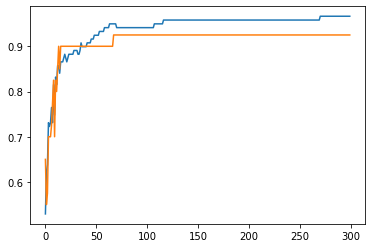

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [25]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [27]:
#다른 모델도 적용 가능 hinge는 SVM임

In [28]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
